# 🎯 Masterclass de Callbacks en ADK: Tu Superpoder Secreto

## 🚀 Tutorial Completo: Dominando los Callbacks en Google ADK

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/)

### 📋 ¿Qué aprenderás en este tutorial?

1. **¿Qué son los Callbacks?** - Conceptos fundamentales y puntos de control
2. **Patrón Observador** - Logging y debugging avanzado
3. **Patrón Guardián** - Seguridad y validación de contenido
4. **Patrón Personalizador** - Control dinámico del comportamiento
5. **Patrón Controlador** - Gestión avanzada de herramientas
6. **Sistemas de Debugging** - Monitoreo y métricas en producción
7. **Patrones Avanzados** - Cache, retry y optimización
8. **Ejercicios Prácticos** - Desafíos para aplicar lo aprendido
9. **Mejores Prácticas** - Errores comunes y patrones recomendados
10. **Conclusión** - Próximos pasos y recursos

---

### 👤 Sobre este Tutorial

Este notebook te convertirá en un **maestro arquitecto de agentes** al dominar los callbacks de ADK. Los callbacks son puntos de control que te permiten interceptar, modificar y controlar cada paso del flujo de ejecución de tus agentes.

**Requisitos previos:**
- Conocimientos básicos de Python
- Familiaridad con ADK (haber completado las clases anteriores)
- API Key de Google AI Studio

## 🌟 Bienvenido al Mundo del Control de Agentes!

Imagina que eres el director de una película. Tus actores (agentes) son talentosos, 
pero a veces necesitas intervenir y decir "¡Corte! Probemos esa escena de manera diferente". 
Eso es exactamente lo que hacen los callbacks en ADK.

**Lo que aprenderás:**
- 🎪 La anatomía de los callbacks y cuándo se activan.
- 🛡️ Cómo construir barreras de seguridad (guardrails).
- 🎯 Técnicas para personalizar el comportamiento del agente.
- 🔍 Patrones avanzados para depuración y monitoreo.
- 💡 Escenarios del mundo real y mejores prácticas.

**Prerrequisitos:**
- Comprensión básica de los agentes de ADK.
- Conocimientos de programación en Python.
- ¡Un espíritu aventurero! 🗺️

## 📚 Configuración Inicial

In [ ]:
# Instalar Google ADK
!pip install -qU google-adk==1.4.2

In [37]:
# Importaciones necesarias
import os
import logging
from typing import Optional, Dict, Any
import json
from copy import deepcopy
from datetime import datetime

# Importaciones de ADK
from google.genai import types
from google.adk.agents import LlmAgent
from google.adk.agents.callback_context import CallbackContext
from google.adk.tools.tool_context import ToolContext
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.models import LlmResponse, LlmRequest

# Set up logging to see what's happening
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


#### Opcion 1: Ingresalas directamente

In [2]:
from getpass import getpass
# Solicitar API Key de forma segura
if 'GOOGLE_API_KEY' not in os.environ:
    print("🔑 Por favor, ingresa tu Google API Key:")
    api_key = getpass("API Key: ")
    os.environ['GOOGLE_API_KEY'] = api_key
    os.environ['GOOGLE_GENAI_USE_VERTEXAI'] = 'FALSE'
    print("\n✅ API Key configurada correctamente")
else:
    print("✅ API Key ya configurada")

# Verificar que las variables estén configuradas
print(f"\n📋 Variables de entorno configuradas:")
print(f"   - GOOGLE_API_KEY: {'✓' if os.environ.get('GOOGLE_API_KEY') else '✗'}")
print(f"   - GOOGLE_GENAI_USE_VERTEXAI: {os.environ.get('GOOGLE_GENAI_USE_VERTEXAI', 'No configurado')}")

print("✅ ADK instalado y configurado correctamente!")

🔑 Por favor, ingresa tu Google API Key:

✅ API Key configurada correctamente

📋 Variables de entorno configuradas:
   - GOOGLE_API_KEY: ✗
   - GOOGLE_GENAI_USE_VERTEXAI: FALSE
✅ ADK instalado y configurado correctamente!


_____

#### Opcion 2: Cargar por Dotenv

In [2]:
from dotenv import load_dotenv
# Cargar variables de entorno desde .env si existe
load_dotenv(override=True)

True

#### Nuestra función de inferencia

_____

In [3]:
async def call_agent_async(query: str, runner, user_id, session_id):
    """Envía una consulta al agente e imprime la respuesta final."""
    print(f"\n>>> Consulta del usuario: {query}")

    # Prepara el mensaje del usuario en el formato de ADK
    content = types.Content(role='user', parts=[types.Part(text=query)])

    final_response_text = "El agente no produjo una respuesta final." # Valor por defecto

    # Concepto clave: run_async ejecuta la lógica del agente y genera eventos.
    # Iteramos a través de los eventos para encontrar la respuesta final.
    async for event in runner.run_async(user_id=user_id, session_id=session_id, new_message=content):
        # Puedes descomentar la línea de abajo para ver *todos* los eventos durante la ejecución
        # print(f"  [Evento] Autor: {event.author}, Tipo: {type(event).__name__}, Final: {event.is_final_response()}, Contenido: {event.content}")

        # Concepto clave: is_final_response() marca el mensaje que concluye el turno.
        if event.is_final_response():
            if event.content and event.content.parts:
                # Se asume que la respuesta de texto está en la primera parte
                final_response_text = event.content.parts[0].text
            elif event.actions and event.actions.escalate: # Maneja posibles errores/escalamientos
                final_response_text = f"El agente escaló: {event.error_message or 'Sin mensaje específico.'}"
            # Agrega más validaciones aquí si es necesario (por ejemplo, códigos de error específicos)
            break # Deja de procesar eventos una vez encontrada la respuesta final

    print(f"<<< Respuesta del agente: {final_response_text}")


## 📚 Capítulo 1: El Descubrimiento - ¿Qué Son los Callbacks?

### 🔍 Concepto Clave
Los callbacks son puntos de control en el viaje de tu agente donde puedes:
1. **Observar** lo que está sucediendo
2. **Modificar** los datos que fluyen
3. **Controlar** si continuar o tomar un camino diferente

### 🎯 Los Seis Puntos de Control de Callbacks

El viaje de cada agente tiene estos momentos clave:

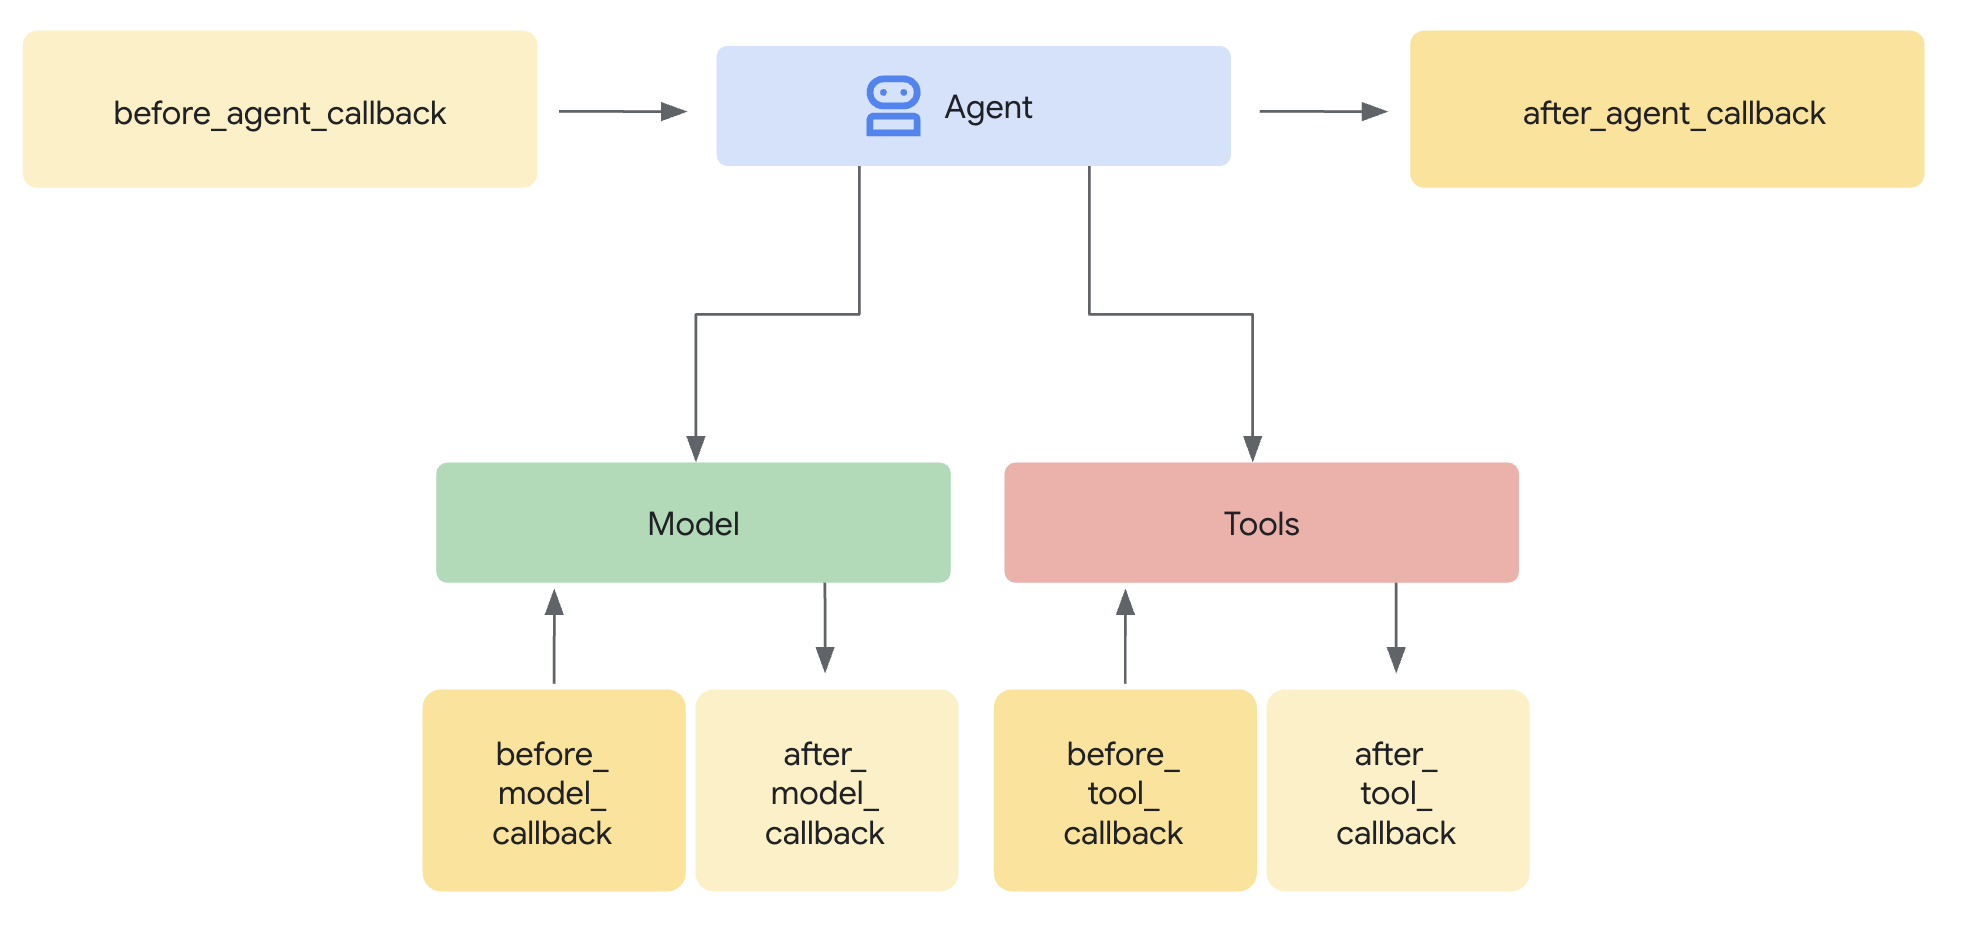

## 🏗️ Capítulo 2: Tu Primer Callback - El Patrón Observador

In [4]:
def before_agent_callback(callback_context: CallbackContext) -> Optional[types.Content]:
    """Se ejecuta cuando el agente está por comenzar su trabajo principal"""
    logger.info(f"1️⃣ before_agent_callback 🚀 [{callback_context.agent_name}] Iniciando conversación {callback_context.invocation_id}")
    
    # Solo observando - retornamos None para que el agente continúe
    return None

def after_agent_callback(callback_context: CallbackContext) -> Optional[types.Content]:
    """Se ejecuta cuando el agente ha terminado su trabajo"""
    logger.info(f"4️⃣ after_agent_callback 🏁 [{callback_context.agent_name}] Conversación completada {callback_context.invocation_id}")
    
    # Solo observando - retornamos None para usar el resultado del agente
    return None

def before_model_callback(callback_context: CallbackContext, llm_request: LlmRequest) -> Optional[LlmResponse]:
    """A punto de llamar al LLM"""
    logger.info(f"2️⃣ before_model_callback 🧠 [{callback_context.agent_name}] Llamando al LLM con {len(llm_request.contents)} mensajes")
    
    # Echemos un vistazo al último mensaje del usuario (de forma segura)
    if llm_request.contents:
        last_msg = llm_request.contents[-1]
        if last_msg.role == 'user' and last_msg.parts:
            texto = last_msg.parts[0].text
            preview = texto[:100] + "..." if len(texto) > 100 else texto
            logger.info(f"💬 Vista previa del mensaje: {preview}")
    
    return None

def after_model_callback(callback_context: CallbackContext, llm_response: LlmResponse) -> Optional[LlmResponse]:
    """El LLM ha respondido"""
    logger.info(f"3️⃣ after_model_callback 🎯 [{callback_context.agent_name}] El LLM respondió")

    # Vista previa segura de la respuesta
    if llm_response.content and llm_response.content.parts:
        texto = llm_response.content.parts[0].text
        preview = texto[:100] + "..." if len(texto) > 100 else texto
        logger.info(f"📝 Vista previa de respuesta: {preview}")
    
    return None

# Crear nuestro observador
agente_observador = LlmAgent(
    name="chatbot_observador",
    model="gemini-2.0-flash",
    instruction="Eres un asistente útil que proporciona respuestas breves y amigables.",
    before_agent_callback=before_agent_callback,
    after_agent_callback=after_agent_callback,
    before_model_callback=before_model_callback,
    after_model_callback=after_model_callback
)

print("🔍 ¡Agente observador creado! Veamos qué sucede cuando lo usamos...")

🔍 ¡Agente observador creado! Veamos qué sucede cuando lo usamos...


In [5]:
APP_NAME = "callback_agent_example"
USER_ID = "user_1"
SESSION_ID = "session_001" # Usando un ID fijo por simplicidad

async def setup_session_and_runner(agent, state=None):
    session_service = InMemorySessionService()
    if state is not None:
        # Si se proporciona un estado, lo usamos para la sesión
        session = await session_service.create_session(app_name=APP_NAME, user_id=USER_ID, session_id=SESSION_ID, state=state)
    else:        
        session = await session_service.create_session(app_name=APP_NAME, user_id=USER_ID, session_id=SESSION_ID)
    runner = Runner(agent=agent, app_name=APP_NAME, session_service=session_service)
    return session, runner

session, runner = await setup_session_and_runner(agente_observador)

In [6]:
await call_agent_async(query="¿Cuál es la capital de Francia?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:31:52,903 - INFO - 1️⃣ before_agent_callback 🚀 [chatbot_observador] Iniciando conversación e-b491e569-fdf9-48ff-9b9d-94c9cd343c50
2025-07-14 22:31:52,905 - INFO - 2️⃣ before_model_callback 🧠 [chatbot_observador] Llamando al LLM con 1 mensajes
2025-07-14 22:31:52,906 - INFO - 💬 Vista previa del mensaje: ¿Cuál es la capital de Francia?
2025-07-14 22:31:52,996 - INFO - Sending out request, model: gemini-2.0-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 22:31:52,998 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente útil que proporciona respuestas breves y amigables.

You are an agent. Your internal name is "chatbot_observador".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuál es la capital de Francia?"}],"role":"user"}
-----------------------------------------------------------
Functions:

------------------------------------------------


>>> Consulta del usuario: ¿Cuál es la capital de Francia?


2025-07-14 22:31:54,089 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 22:31:54,096 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
La capital de Francia es París.

-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 03:31:54 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosniff","server-timing":"gfet4t7; dur=984","alt-svc":"h3=\":443\"; ma=2592000,h3-29=\":443\"; ma=2592000","transfer-encoding":"chunked"}},"candidates":[{"content":{"parts":[{"text":"La capital de Francia es París.\n"}],"role":"model"},"finish

<<< Respuesta del agente: La capital de Francia es París.



### 🎭 ¿Qué observamos?
- ✅ **Before Agent**: Inicio de conversación, estado registrado
- ✅ **Before Model**: Solicitud al LLM interceptada y registrada
- ✅ **After Model**: Respuesta del LLM capturada y vista previa mostrada
- ✅ **After Agent**: Estado final y finalización registrada

## 🛡️ Capítulo 3: El Guardián - Construyendo Seguridad con Callbacks

In [7]:
class GuardianDeContenido:
    """La clase guardián - protege contra contenido inapropiado"""
    
    def __init__(self):
        # Temas que no queremos discutir
        self.temas_prohibidos = [
            'contraseña', 'tarjeta de crédito', 'información personal','actividad ilegal', 'contenido dañino'
        ]
        
        # Respuestas para diferentes violaciones
        self.respuestas_seguridad = {
            'tema_prohibido': "Lo siento, pero no puedo ayudar con ese tema. ¡Hablemos de algo más en lo que pueda asistirte!",
            'solicitud_inapropiada': "Estoy diseñado para ser útil, inofensivo y honesto. Déjame ayudarte con algo apropiado.",
            'privacidad_datos': "No puedo ayudar con solicitudes que involucren información personal o sensible. ¡Tu privacidad es importante!"
        }
    
    def before_model_callback(self, callback_context: CallbackContext, llm_request: LlmRequest) -> Optional[LlmResponse]:
        """Verificar la solicitud antes de que vaya al LLM"""
        
        # Obtener el mensaje del usuario (último contenido en la solicitud)
        if not llm_request.contents:
            return None  # No hay contenido que verificar
        
        mensaje_usuario = ""
        ultimo_contenido = llm_request.contents[-1]
        if ultimo_contenido.role == 'user' and ultimo_contenido.parts:
            mensaje_usuario = ultimo_contenido.parts[0].text.lower()
        
        # Verificar temas prohibidos
        for tema in self.temas_prohibidos:
            if tema in mensaje_usuario:
                logger.warning(f"🚨 BLOQUEADO: Tema prohibido detectado: '{tema}'")
                
                # Crear una respuesta de seguridad - ¡esto OMITE la llamada al LLM!
                respuesta_seguridad = LlmResponse(
                    content=types.Content(
                        role="model",
                        parts=[types.Part(text=self.respuestas_seguridad['tema_prohibido'])]
                    )
                )
                
                return respuesta_seguridad  # ¡Esto previene la llamada al LLM!
        
        # Verificar solicitudes de datos sensibles
        palabras_sensibles = ['ssn', 'seguro social', 'cuenta bancaria', 'número de ruta']
        for palabra in palabras_sensibles:
            if palabra in mensaje_usuario:
                logger.warning(f"🚨 BLOQUEADO: Solicitud de datos sensibles detectada: '{palabra}'")
                
                respuesta_seguridad = LlmResponse(
                    content=types.Content(
                        role="model",
                        parts=[types.Part(text=self.respuestas_seguridad['privacidad_datos'])]
                    )
                )
                
                return respuesta_seguridad
        
        # Todas las verificaciones pasaron - dejar que el LLM lo maneje
        logger.info("✅ Verificación de contenido aprobada - procediendo al LLM")
        return None

# Crear nuestro guardián
guardian = GuardianDeContenido()

# Crear un agente protegido
agente_protegido = LlmAgent(
    name="chatbot_protegido",
    model="gemini-2.0-flash",
    instruction="Eres un asistente útil de servicio al cliente.",
    before_model_callback=guardian.before_model_callback
)

print("🛡️ ¡Sistema guardián creado! Probemos las características de seguridad...")

🛡️ ¡Sistema guardián creado! Probemos las características de seguridad...


In [8]:
APP_NAME = "callback_guard"
USER_ID = "user_1"
SESSION_ID = "session_001" # Usando un ID fijo por simplicidad

session, runner = await setup_session_and_runner(agente_protegido)

In [9]:
await call_agent_async(query="¿Cómo puedo actualizar mi perfil?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:42:11,064 - INFO - ✅ Verificación de contenido aprobada - procediendo al LLM
2025-07-14 22:42:11,157 - INFO - Sending out request, model: gemini-2.0-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 22:42:11,163 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente útil de servicio al cliente.

You are an agent. Your internal name is "chatbot_protegido".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cómo puedo actualizar mi perfil?"}],"role":"user"}
-----------------------------------------------------------
Functions:

-----------------------------------------------------------

2025-07-14 22:42:11,170 - INFO - AFC is enabled with max remote calls: 10.



>>> Consulta del usuario: ¿Cómo puedo actualizar mi perfil?


2025-07-14 22:42:12,516 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 22:42:12,524 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
Si desea actualizar su perfil, puede hacerlo iniciando sesión en su cuenta y yendo a la sección "Mi perfil". Una vez que esté allí, podrá cambiar su información personal, como su nombre, dirección de correo electrónico y número de teléfono. También puede agregar una foto de perfil y una biografía.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 03:42:12 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-

<<< Respuesta del agente: Si desea actualizar su perfil, puede hacerlo iniciando sesión en su cuenta y yendo a la sección "Mi perfil". Una vez que esté allí, podrá cambiar su información personal, como su nombre, dirección de correo electrónico y número de teléfono. También puede agregar una foto de perfil y una biografía.


In [10]:
await call_agent_async(query="¿Cual es mi contraseña del CRM?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:42:59,307 - WARNING - 🚨 BLOQUEADO: Tema prohibido detectado: 'contraseña'



>>> Consulta del usuario: ¿Cual es mi contraseña del CRM?
<<< Respuesta del agente: Lo siento, pero no puedo ayudar con ese tema. ¡Hablemos de algo más en lo que pueda asistirte!


In [11]:
await call_agent_async(query="Mi cuenta bancaria es 1234, ¿puedes ayudar?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:43:33,446 - WARNING - 🚨 BLOQUEADO: Solicitud de datos sensibles detectada: 'cuenta bancaria'



>>> Consulta del usuario: Mi cuenta bancaria es 1234, ¿puedes ayudar?
<<< Respuesta del agente: No puedo ayudar con solicitudes que involucren información personal o sensible. ¡Tu privacidad es importante!


#### 💡 Aprendizaje Clave
Cuando retornas un objeto en lugar de `None`, ¡anulas el comportamiento predeterminado!
- `return None` → Continuar normal
- `return LlmResponse` → Omitir llamada al LLM y usar esta respuesta

## 🎯 Capítulo 4: El Personalizador - Control Dinámico del Comportamiento


El sistema guardián funcionaba genial, pero ahora quería más sofisticación. Diferentes usuarios deberían obtener diferentes experiencias basadas en sus preferencias, nivel de membresía o historial de conversación.
- ### 🧠 El Patrón de Personalización Basado en Estado

Aquí es donde el `context.state` se convierte en tu mejor amigo. Es como tener una memoria que persiste durante toda la conversación.

In [12]:
preferencias_usuario = {
            'premium': {'estilo': 'detallado', 'saludo': '¡Bienvenido de nuevo, cliente valioso!'},
            'estandar': {'estilo': 'conciso', 'saludo': '¡Hola! ¿Cómo puedo ayudarte hoy?'},
            'nuevo': {'estilo': 'amigable y explicativo', 'saludo': '¡Bienvenido! Estoy aquí para ayudarte a comenzar.'}
        }
instrucciones_estilo = {
            'detallado': "Proporciona respuestas completas y detalladas con ejemplos, ademas responde en español",
            'conciso': "Mantén las respuestas breves y al grano, responde en frances",
            'amigable y explicativo': "Sé extra amigable y explica las cosas paso a paso, responde en ingles"
        }

In [13]:
def before_agent_callback(callback_context: CallbackContext) -> None:
    """Configura el estado que se usará en la plantilla de la instrucción."""
    # Simula la carga del tipo de usuario
    agent_name = callback_context.agent_name
    current_state = callback_context.state.to_dict()
    logger.info(f"[Callback] Current State: {current_state}")

    if not current_state.get("tipo_usuario") or current_state.get("tipo_usuario") not in preferencias_usuario:
        return types.Content(
            parts=[types.Part(text=f"El agente {agent_name} no puede continuar debido a que no se encuentra el tipo de usuario {current_state.get('tipo_usuario')}")],
            role="model" # Assign model role to the overriding response
        )
    return None

def before_model_callback( callback_context: CallbackContext, llm_request: LlmRequest) -> Optional[LlmResponse]:
    """Personaliza la solicitud al LLM según las preferencias del usuario."""
    
    tipo_usuario = callback_context.state.get('tipo_usuario')
    preferencias = preferencias_usuario.get(tipo_usuario)
    instruccion_estilo = instrucciones_estilo.get(preferencias['estilo'])
    
    # Añade la personalización a la instrucción del sistema
    instruccion_original = llm_request.config.system_instruction
    instruccion_mejorada = f"{instruccion_original}\n\nEstilo de Respuesta: {instruccion_estilo}"
    llm_request.config.system_instruction = instruccion_mejorada
    
    logger.info(f"🎨 Prompt personalizado para usuario '{tipo_usuario}' con estilo '{preferencias['estilo']}'.")
    logger.info(f"🔍 Instrucción modificada: {instruccion_mejorada}")
    
    return None  

def after_model_callback( callback_context: CallbackContext, llm_response: LlmResponse) -> Optional[LlmResponse]:
    """Post-procesa la respuesta según las preferencias del usuario."""
    tipo_usuario = callback_context.state.get('tipo_usuario')
    if not (llm_response.content and llm_response.content.parts):
        return None

    contenido_original = llm_response.content.parts[0].text
    
    if tipo_usuario == 'premium':
        contenido_mejorado = f"{contenido_original}\n\n✨ *Soporte Premium: ¿Necesitas ayuda inmediata? Usa nuestro canal prioritario.*"
        logger.info("💎 Añadido pie de página premium a la respuesta.")
        llm_response.content.parts[0].text = contenido_mejorado
    elif tipo_usuario == 'nuevo':
        contenido_mejorado = f"{contenido_original}\n\n💡 *Tip para nuevos usuarios: ¡Siempre puedes pedirme que explique algo con más detalle!*"
        logger.info("🌟 Añadido tip para nuevos usuarios a la respuesta.")
        llm_response.content.parts[0].text = contenido_mejorado
        
    return None

# Crear nuestro personalizador y el agente
agente_personalizado = LlmAgent(
    name="chatbot_personalizado",
    model="gemini-2.0-flash",
    description='Agente para servicio al cliente personalizado',
    instruction="Eres un asistente de servicio al cliente.",
    before_agent_callback=before_agent_callback,
    before_model_callback=before_model_callback,
    after_model_callback=after_model_callback
)

print("🎨 ¡Sistema personalizador creado! Veamos cómo se adapta a diferentes usuarios...")

🎨 ¡Sistema personalizador creado! Veamos cómo se adapta a diferentes usuarios...


In [14]:
APP_NAME = "callback_perzonlized"
USER_ID = "user_1"
SESSION_ID = "session_001" # Usando un ID fijo por simplicidad
state = {
    'tipo_usuario': 'Test_user'  # Cambia esto a 'estandar' o 'nuevo' para probar otros estilos
}

session, runner = await setup_session_and_runner(agente_personalizado, state)


In [15]:
await call_agent_async(query="como puedo actualizar mi perfil de instagram",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:52:05,940 - INFO - [Callback] Current State: {'tipo_usuario': 'Test_user'}



>>> Consulta del usuario: como puedo actualizar mi perfil de instagram
<<< Respuesta del agente: El agente chatbot_personalizado no puede continuar debido a que no se encuentra el tipo de usuario Test_user


In [16]:
APP_NAME = "callback_perzonlized"
USER_ID = "user_1"
SESSION_ID = "session_001" # Usando un ID fijo por simplicidad
state = {
    'tipo_usuario': 'estandar'  # Cambia esto a 'estandar' o 'nuevo' para probar otros estilos
}

session, runner = await setup_session_and_runner(agente_personalizado, state)

await call_agent_async(query="como puedo actualizar mi perfil de instagram",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:53:21,037 - INFO - [Callback] Current State: {'tipo_usuario': 'estandar'}
2025-07-14 22:53:21,040 - INFO - 🎨 Prompt personalizado para usuario 'estandar' con estilo 'conciso'.
2025-07-14 22:53:21,041 - INFO - 🔍 Instrucción modificada: Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de Respuesta: Mantén las respuestas breves y al grano, responde en frances
2025-07-14 22:53:21,068 - INFO - Sending out request, model: gemini-2.0-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 22:53:21,069 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de Respuesta: Mantén las res


>>> Consulta del usuario: como puedo actualizar mi perfil de instagram


2025-07-14 22:53:22,263 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 22:53:22,269 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
Pour mettre à jour votre profil Instagram, appuyez sur « Modifier le profil ». Vous pouvez ensuite modifier vos informations.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 03:53:22 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosniff","server-timing":"gfet4t7; dur=1044","alt-svc":"h3=\":443\"; ma=2592000,h3-29=\":443\"; ma=2592000","transfer-encoding":"chunked"}},"candidate

<<< Respuesta del agente: Pour mettre à jour votre profil Instagram, appuyez sur « Modifier le profil ». Vous pouvez ensuite modifier vos informations.


In [17]:
state={"tipo_usuario": 'premium'}

session, runner = await setup_session_and_runner(agente_personalizado, state)

await call_agent_async(query="como puedo actualizar mi perfil de instagram",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:54:49,944 - INFO - [Callback] Current State: {'tipo_usuario': 'premium'}
2025-07-14 22:54:49,947 - INFO - 🎨 Prompt personalizado para usuario 'premium' con estilo 'detallado'.
2025-07-14 22:54:49,952 - INFO - 🔍 Instrucción modificada: Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de Respuesta: Proporciona respuestas completas y detalladas con ejemplos, ademas responde en español
2025-07-14 22:54:49,984 - INFO - Sending out request, model: gemini-2.0-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 22:54:49,985 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de


>>> Consulta del usuario: como puedo actualizar mi perfil de instagram


2025-07-14 22:54:56,412 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 22:54:56,416 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
¡Claro que sí! Aquí te explico cómo puedes actualizar tu perfil de Instagram paso a paso:

**1. Abre la aplicación de Instagram:**
   - Busca el icono de Instagram en tu teléfono (generalmente es un icono morado, naranja y amarillo con una cámara blanca) y tócalo para abrir la aplicación.

**2. Ve a tu perfil:**
   - En la esquina inferior derecha de la pantalla, verás un icono que se parece a una persona o a tu foto de perfil si ya tienes una. Toca este icono para ir a tu perfil.

**3. Edita tu perfil:**
   - Una vez en tu perfil, verás un botón que dice "Editar perfil" justo debajo de tu biografía (si ya tienes una) y encima de tus publicaciones. Toca este botón.

**4. Modifica la información:**
   - Ahora verás var

<<< Respuesta del agente: ¡Claro que sí! Aquí te explico cómo puedes actualizar tu perfil de Instagram paso a paso:

**1. Abre la aplicación de Instagram:**
   - Busca el icono de Instagram en tu teléfono (generalmente es un icono morado, naranja y amarillo con una cámara blanca) y tócalo para abrir la aplicación.

**2. Ve a tu perfil:**
   - En la esquina inferior derecha de la pantalla, verás un icono que se parece a una persona o a tu foto de perfil si ya tienes una. Toca este icono para ir a tu perfil.

**3. Edita tu perfil:**
   - Una vez en tu perfil, verás un botón que dice "Editar perfil" justo debajo de tu biografía (si ya tienes una) y encima de tus publicaciones. Toca este botón.

**4. Modifica la información:**
   - Ahora verás varias opciones que puedes cambiar:
     - **Foto de perfil:** Toca "Editar foto o avatar" para cambiar tu foto de perfil. Puedes elegir una foto de tu galería, importar desde Facebook, tomar una foto nueva o usar un avatar.
     - **Nombre:** Este e

In [18]:
state={"tipo_usuario": 'nuevo'}

session, runner = await setup_session_and_runner(agente_personalizado, state)

await call_agent_async(query="como puedo actualizar mi perfil de instagram",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID
)

2025-07-14 22:56:39,267 - INFO - [Callback] Current State: {'tipo_usuario': 'nuevo'}
2025-07-14 22:56:39,271 - INFO - 🎨 Prompt personalizado para usuario 'nuevo' con estilo 'amigable y explicativo'.
2025-07-14 22:56:39,273 - INFO - 🔍 Instrucción modificada: Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de Respuesta: Sé extra amigable y explica las cosas paso a paso, responde en ingles
2025-07-14 22:56:39,308 - INFO - Sending out request, model: gemini-2.0-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 22:56:39,309 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente de servicio al cliente.

You are an agent. Your internal name is "chatbot_personalizado".

 The description about you is "Agente para servicio al cliente personalizado"

Estilo de Respues


>>> Consulta del usuario: como puedo actualizar mi perfil de instagram


2025-07-14 22:56:42,732 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 22:56:42,741 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
¡Claro que sí! I can help you with that. Here are the steps on how to update your Instagram profile:

1.  Open the Instagram app on your phone.
2.  Tap your profile picture in the bottom right corner to go to your profile.
3.  Tap "Edit Profile" at the top of the screen.
4.  Here, you can change several aspects of your profile:

    *   **Name:** This is usually your real name or the name you want people to know you by.
    *   **Username:** This is your unique Instagram handle. Note that you can only change it once every 14 days.
    *   **Pronouns:** You can add your preferred pronouns.
    *   **Website:** If you have a personal website, blog, or any other webpage you want to share, put the link here.
    *   **Bio

<<< Respuesta del agente: ¡Claro que sí! I can help you with that. Here are the steps on how to update your Instagram profile:

1.  Open the Instagram app on your phone.
2.  Tap your profile picture in the bottom right corner to go to your profile.
3.  Tap "Edit Profile" at the top of the screen.
4.  Here, you can change several aspects of your profile:

    *   **Name:** This is usually your real name or the name you want people to know you by.
    *   **Username:** This is your unique Instagram handle. Note that you can only change it once every 14 days.
    *   **Pronouns:** You can add your preferred pronouns.
    *   **Website:** If you have a personal website, blog, or any other webpage you want to share, put the link here.
    *   **Bio:** This is a short description of who you are or what your account is about. Use it to give visitors a sense of what they can expect from your profile.
5.  Once you've made the changes you want, tap "Done" (iOS) or the checkmark (Android) to save

## 🔧 Capítulo 5: El Maestro de Herramientas - Controlando la Ejecución

### 🛠️ El Cuarto Desafío: "¡Necesito Controlar el Uso de Herramientas!"

El agente se estaba volviendo más sofisticado, pero ahora quería controlar cuándo y cómo se usan las herramientas. 

### ⚙️ El Patrón de Control de Herramientas

Los callbacks de herramientas te dan control sobre cada ejecución. Puedes validar argumentos, implementar caché, manejar autenticación e incluso simular respuestas de herramientas para pruebas.

In [19]:
# =========================
#   HERRAMIENTAS SIMPLES
# =========================

from google.adk.tools import FunctionTool

def calculator(operation: str, num1: float, num2: float) -> dict:
    """
    Calculator function tool: realiza operaciones aritméticas básicas.

    Parámetros:
      - operation (str): "add", "subtract", "multiply" o "divide"
      - num1 (float): primer operando
      - num2 (float): segundo operando

    Retorna:
      Dict con:
        - status: "success" o "error"
        - operation: tipo de operación
        - num1, num2: operandos para claridad
        - result: resultado si status == success
        - error_message: explicación en caso de error
    """
    # Validación de operaciones permitidas
    if operation not in {"add", "subtract", "multiply", "divide"}:
        return {"status": "error", "error_message": f"Operación desconocida: {operation}"}

    # Manejo de división por cero
    if operation == "divide" and num2 == 0:
        return {"status": "error", "operation": operation, "num1": num1, "num2": num2,
                "error_message": "No se puede dividir por cero"}

    # Ejecución de la operación
    try:
        if operation == "add":
            result = num1 + num2
        elif operation == "subtract":
            result = num1 - num2
        elif operation == "multiply":
            result = num1 * num2
        else:  # divide
            # Añadir protección para divisiones por valores muy pequeños
            divisor = num2 if abs(num2) >= 0.0001 else 0.0001
            result = num1 / divisor

    except Exception as e:
        return {"status": "error", "operation": operation, "num1": num1, "num2": num2,
                "error_message": f"Error interno: {e}"}

    return {
        "status": "success",
        "operation": operation,
        "num1": num1,
        "num2": num2,
        "result": result
    }


def get_weather(city: str) -> dict:
    """Consulta el clima de una ciudad."""
    print(f"🌤️ Consultando clima de: {city}")
    
    # Datos simulados
    weather_data = {
        "new york": {"temp": 22, "condition": "sunny"},
        "london": {"temp": 15, "condition": "rainy"},
        "tokyo": {"temp": 28, "condition": "cloudy"},
        "paris": {"temp": 18, "condition": "partly cloudy"}
    }
    
    city_lower = city.lower()
    if city_lower in weather_data:
        data = weather_data[city_lower]
        return {
            "status": "success",
            "city": city,
            "temperature": data["temp"],
            "condition": data["condition"]
        }
    else:
        return {
            "status": "error",
            "error": f"Weather data not available for {city}",
            "available_cities": list(weather_data.keys())
        }

In [20]:
from google.adk.tools.tool_context import ToolContext
from google.adk.tools.base_tool import BaseTool

In [38]:
def simple_before_tool_example(
    tool: BaseTool, 
    args: Dict[str, Any], 
    tool_context: ToolContext
) -> Optional[Dict]:
    """
    Before Tool Callback - Se ejecuta ANTES de la herramienta
    
    Casos de uso comunes:
    - Validar argumentos
    - Bloquear ciertas operaciones
    - Modificar argumentos
    - Contar usos
    """
    
    tool_name = tool.name
    logger.info(f"🔍 [BEFORE] Validando herramienta: {tool_name}")
    logger.info(f"🔍 [BEFORE] Argumentos recibidos: {args}")
    
    # === CASO 1: VALIDACIÓN SIMPLE ===
    if tool_name == "calculator":
        # Bloquear divisiones por números muy pequeños (podrían causar números enormes)
        if args.get("operation") == "divide" and abs(args.get("num2", 1)) < 0.001:
            logger.info("❌ [BLOCKED] División por número muy pequeño")
            return {
                "error": "Cannot divide by very small numbers",
                "message": "Please use a divisor greater than 0.001"
            }
        
        # Modificar argumentos - convertir números negativos a positivos para suma
        if args.get("operation") == "add":
            num1 = args.get("num1", 0)
            num2 = args.get("num2", 0)
            if num1 < 0 or num2 < 0:
                logger.info("⚠️ [INFO] Números negativos detectados, se procesarán como están")
                # Solo informar, no modificar los datos
    
    # === CASO 2: CONTEO DE USOS ===
    # Contar cuántas veces se usa cada herramienta
    usage_count = tool_context.state.get(f"usage_{tool_name}", 0)
    usage_count += 1
    tool_context.state[f"usage_{tool_name}"] = usage_count
    print(f"📊 [STATS] Herramienta '{tool_name}' usada {usage_count} veces")
    
    # === CASO 3: LÍMITE DE USO ===
    if tool_name == "get_weather" and usage_count > 3:
        logger.info("❌ [BLOCKED] Límite de consultas de clima alcanzado")
        return {
            "error": "Weather query limit reached",
            "message": "Maximum 3 weather queries allowed",
            "current_count": usage_count
        }
    
    logger.info("✅ [APPROVED] Herramienta aprobada para ejecutar")
    return None  # Permitir que la herramienta se ejecute

# ========================================
# EJEMPLO 2: AFTER TOOL CALLBACK SIMPLE  
# ========================================

def simple_after_tool_example(
    tool: BaseTool, 
    args: Dict[str, Any], 
    tool_context: ToolContext, 
    tool_response: Dict
) -> Optional[Dict]:
    """
    After Tool Callback - Se ejecuta DESPUÉS de la herramienta
    
    Casos de uso comunes:
    - Mejorar la respuesta
    - Agregar información extra
    - Formatear resultados
    - Guardar datos
    """
    
    tool_name = tool.name
    logger.info(f"🔄 [AFTER] Procesando resultado de: {tool_name}")
    logger.info(f"🔄 [AFTER] Respuesta original: {tool_response}")
    
    # Crear una copia para modificar (IMPORTANTE: no modificar el original)
    enhanced_response = deepcopy(tool_response)
    
    # === CASO 1: MEJORAR RESPUESTA DE CALCULADORA ===
    if tool_name == "calculator" and "error" not in enhanced_response:
        result = enhanced_response.get("result")
        operation = enhanced_response.get("operation")
        
        # Agregar información útil
        result_formated = f"{result:,.2f}"
        
        # Agregar interpretación
        if operation == "divide" and result < 1:
            enhanced_response["result"] = f"El resultado {result_formated} es menor que 1"
        elif operation == "multiply" and result > 1000:
            enhanced_response["result"] = f"El resultado {result_formated} es un número grande"
        elif operation == "add":
            enhanced_response["result"] = f"La suma total es {result_formated} ... ten un buen día"

    # === CASO 2: MEJORAR RESPUESTA DEL CLIMA ===
    elif tool_name == "get_weather" and "error" not in enhanced_response:
        temp = enhanced_response.get("temperature")
        condition = enhanced_response.get("condition")
        city = enhanced_response.get("city")
        
        # Convertir temperatura a Fahrenheit
        temp_f = (temp * 9/5) + 32
        enhanced_response["temperature_fahrenheit"] = round(temp_f, 1)
        enhanced_response["temperature_display"] = f"{temp}°C ({temp_f:.1f}°F)"
        
        # Agregar recomendaciones
        recommendations = []
        if temp < 10:
            recommendations.append("Lleva abrigo, hace frío")
        elif temp > 25:
            recommendations.append("Usa ropa ligera, hace calor")
        
        if condition == "rainy":
            recommendations.append("No olvides el paraguas")
        elif condition == "sunny":
            recommendations.append("Perfecto para salir a pasear")
        
        enhanced_response["recommendations"] = recommendations
        
        # Agregar mensaje personalizado
        enhanced_response["summary"] = f"En {city} hace {temp}°C y está {condition}"
    
    # === CASO 3: GUARDAR HISTORIAL ===
    # Mantener un historial de los últimos resultados
    history = tool_context.state.get("results_history", [])
    history_entry = {
        "tool": tool_name,
        "args": args,
        "result": enhanced_response,
        "timestamp": datetime.now().isoformat()
    }
    history.append(history_entry)
    # Mantener solo los últimos 5 resultados
    tool_context.state["results_history"] = history[-5:]
    
    logger.info(f"✅ [ENHANCED] Respuesta mejorada con información adicional")
    print(f"📜 Historial actualizado: {tool_context.state['results_history']} entradas")

    return enhanced_response

In [22]:
# Agente con BEFORE callback
agent_tools = LlmAgent(
    name="AgentWithTools",
    model='gemini-2.5-flash',
    instruction="Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.",
    tools=[calculator, get_weather],
    before_tool_callback=simple_before_tool_example,
    after_tool_callback=simple_after_tool_example
)

In [23]:
APP_NAME = "callback_tool_example"
USER_ID = "user_1"
SESSION_ID = "session_001" 

session, runner = await setup_session_and_runner(agent_tools)

In [24]:
await call_agent_async(query="¿Cuánto es 1000 + 2000?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:16:35,199 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:16:35,202 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
-----------------------------------------------------------
Functions:
calculator: {'operation': {'type': <Type.STRING: 'STRING'>}, 'num1': {'type': <Type.NUMBER: 'NUMBER'>}, 'num2': {'type': <Type.NUMBER: 'NUMBER'>}} 
get_weather: {'city': {'type': <Type.STRING: 'STRING'>}} 
-----------------------------------------------------------

2025-07-14 23:16:35,205 - INFO - AFC is enabled with max remote calls: 10.



>>> Consulta del usuario: ¿Cuánto es 1000 + 2000?


2025-07-14 23:16:36,607 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:16:36,628 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:16:36,632 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: calculator, args: {'num1': 1000, 'num2': 2000, 'operation': 'add'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:16:36 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":

📊 [STATS] Herramienta 'calculator' usada 1 veces
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num1': 1000, 'num2': 2000, 'operation': 'add'}, 'result': {'status': 'success', 'operation': 'add', 'num1': 1000, 'num2': 2000, 'result': 'La suma total es 3,000.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}] entradas


2025-07-14 23:16:38,002 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:16:38,007 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:16:38,008 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
La suma total es 3,000.00.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:16:37 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosnif

<<< Respuesta del agente: La suma total es 3,000.00.


In [25]:
await call_agent_async(query="¿Cuánto es 1000 * 2000?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:19:12,028 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:19:12,035 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_

2025-07-14 23:19:12,044 - INFO - AFC is enabled with max remote calls: 10.



>>> Consulta del usuario: ¿Cuánto es 1000 * 2000?


2025-07-14 23:19:13,366 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:19:13,371 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:19:13,372 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: calculator, args: {'num2': 2000, 'operation': 'multiply', 'num1': 1000}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:19:13 GMT","server":"scaffolding on HTTPServer2","x-xss-protect

📊 [STATS] Herramienta 'calculator' usada 2 veces
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num1': 1000, 'num2': 2000, 'operation': 'add'}, 'result': {'status': 'success', 'operation': 'add', 'num1': 1000, 'num2': 2000, 'result': 'La suma total es 3,000.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': 2000, 'operation': 'multiply', 'num1': 1000}, 'result': {'status': 'success', 'operation': 'multiply', 'num1': 1000, 'num2': 2000, 'result': 'El resultado 2,000,000.00 es un número grande'}, 'timestamp': '2025-07-13 12:00:00'}] entradas


2025-07-14 23:19:13,954 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:19:13,961 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
El resultado 2,000,000.00 es un número grande.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:19:13 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosniff","server-timing":"gfet4t7; dur=470","alt-svc":"h3=\":443\"; ma=2592000,h3-29=\":443\"; ma=2592000","transfer-encoding":"chunked"}},"candidates":[{"content":{"parts":[{"text":"El resultado 2,000,000.00 es un número grande.

<<< Respuesta del agente: El resultado 2,000,000.00 es un número grande.


In [26]:
await call_agent_async(query="Suma -5 y -3?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:22:05,735 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:22:05,736 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_


>>> Consulta del usuario: Suma -5 y -3?


2025-07-14 23:22:06,974 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:22:06,977 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:22:06,978 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: calculator, args: {'num2': -3, 'operation': 'add', 'num1': -5}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:22:06 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0",

📊 [STATS] Herramienta 'calculator' usada 3 veces
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num1': 1000, 'num2': 2000, 'operation': 'add'}, 'result': {'status': 'success', 'operation': 'add', 'num1': 1000, 'num2': 2000, 'result': 'La suma total es 3,000.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': 2000, 'operation': 'multiply', 'num1': 1000}, 'result': {'status': 'success', 'operation': 'multiply', 'num1': 1000, 'num2': 2000, 'result': 'El resultado 2,000,000.00 es un número grande'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': -3, 'operation': 'add', 'num1': -5}, 'result': {'status': 'success', 'operation': 'add', 'num1': -5, 'num2': -3, 'result': 'La suma total es -8.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}] entradas


2025-07-14 23:22:08,064 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:22:08,067 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:22:08,067 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
La suma total es -8.00.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:22:08 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosniff",

<<< Respuesta del agente: La suma total es -8.00.


In [27]:
await call_agent_async(query="Divide 10 entre 0.0001",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:22:55,984 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:22:55,986 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_


>>> Consulta del usuario: Divide 10 entre 0.0001


2025-07-14 23:22:57,276 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:22:57,280 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:22:57,281 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: calculator, args: {'operation': 'divide', 'num2': 0.0001, 'num1': 10}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:22:57 GMT","server":"scaffolding on HTTPServer2","x-xss-protectio

📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num1': 1000, 'num2': 2000, 'operation': 'add'}, 'result': {'status': 'success', 'operation': 'add', 'num1': 1000, 'num2': 2000, 'result': 'La suma total es 3,000.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': 2000, 'operation': 'multiply', 'num1': 1000}, 'result': {'status': 'success', 'operation': 'multiply', 'num1': 1000, 'num2': 2000, 'result': 'El resultado 2,000,000.00 es un número grande'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': -3, 'operation': 'add', 'num1': -5}, 'result': {'status': 'success', 'operation': 'add', 'num1': -5, 'num2': -3, 'result': 'La suma total es -8.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'operation': 'divide', 'num2': 0.0001, 'num1': 10}, 'result': {'error': 'Cannot divide by very small numbers', 'message': 'Please use a divisor greater than 0.001'}, 'ti

2025-07-14 23:22:58,688 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:22:58,691 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:22:58,691 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
No se puede dividir por números muy pequeños, por favor, usa un divisor mayor que 0.001.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:22:58 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","

<<< Respuesta del agente: No se puede dividir por números muy pequeños, por favor, usa un divisor mayor que 0.001.


In [28]:
await call_agent_async(query="Cual es la temperatura en new york?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:23:40,758 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False


2025-07-14 23:23:40,760 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_i-Lj-Sz1mZB2RPx6mzT6mVDixpmwu8zFyxk_aA61LEPI4iPu8a71PWxRFSPx2a3bTL95chFlzPHjXwmmjBYQs84PYuXFL_J6N4bNzSQCugofRZUlAu7WuIk_0NGJEYbkxUF


>>> Consulta del usuario: Cual es la temperatura en new york?


2025-07-14 23:23:41,840 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:23:41,842 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:23:41,843 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'new york'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:23:41 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAME

📊 [STATS] Herramienta 'get_weather' usada 1 veces
🌤️ Consultando clima de: new york
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num1': 1000, 'num2': 2000, 'operation': 'add'}, 'result': {'status': 'success', 'operation': 'add', 'num1': 1000, 'num2': 2000, 'result': 'La suma total es 3,000.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': 2000, 'operation': 'multiply', 'num1': 1000}, 'result': {'status': 'success', 'operation': 'multiply', 'num1': 1000, 'num2': 2000, 'result': 'El resultado 2,000,000.00 es un número grande'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': -3, 'operation': 'add', 'num1': -5}, 'result': {'status': 'success', 'operation': 'add', 'num1': -5, 'num2': -3, 'result': 'La suma total es -8.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'operation': 'divide', 'num2': 0.0001, 'num1': 10}, 'result': {'error': 'Cannot divid

2025-07-14 23:23:43,084 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:23:43,087 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:23:43,088 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
En new york hace 22°C y está soleado.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:23:43 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-optio

<<< Respuesta del agente: En new york hace 22°C y está soleado.


In [29]:
await call_agent_async(query="Cual es la temperatura en paris?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:25:07,028 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:25:07,030 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_


>>> Consulta del usuario: Cual es la temperatura en paris?


2025-07-14 23:25:08,047 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:08,050 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:25:08,051 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'paris'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:08 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORI

📊 [STATS] Herramienta 'get_weather' usada 2 veces
🌤️ Consultando clima de: paris
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num2': 2000, 'operation': 'multiply', 'num1': 1000}, 'result': {'status': 'success', 'operation': 'multiply', 'num1': 1000, 'num2': 2000, 'result': 'El resultado 2,000,000.00 es un número grande'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'num2': -3, 'operation': 'add', 'num1': -5}, 'result': {'status': 'success', 'operation': 'add', 'num1': -5, 'num2': -3, 'result': 'La suma total es -8.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'operation': 'divide', 'num2': 0.0001, 'num1': 10}, 'result': {'error': 'Cannot divide by very small numbers', 'message': 'Please use a divisor greater than 0.001'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'get_weather', 'args': {'city': 'new york'}, 'result': {'status': 'success', 'city': 'new york', 'temperature': 22, 'condition': 'sunn

2025-07-14 23:25:09,020 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:09,023 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
En paris hace 18°C y está parcialmente nublado.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:08 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORIGIN","x-content-type-options":"nosniff","server-timing":"gfet4t7; dur=861","alt-svc":"h3=\":443\"; ma=2592000,h3-29=\":443\"; ma=2592000","transfer-encoding":"chunked"}},"candidates":[{"content":{"parts":[{"text":"En paris hace 18°C y está parcialmente nublad

<<< Respuesta del agente: En paris hace 18°C y está parcialmente nublado.


In [30]:
await call_agent_async(query="Cual es la temperatura en bogota?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:25:17,613 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:25:17,615 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_


>>> Consulta del usuario: Cual es la temperatura en bogota?


2025-07-14 23:25:18,829 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:18,832 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:25:18,833 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'bogota'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:18 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEOR

📊 [STATS] Herramienta 'get_weather' usada 3 veces
🌤️ Consultando clima de: bogota
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'num2': -3, 'operation': 'add', 'num1': -5}, 'result': {'status': 'success', 'operation': 'add', 'num1': -5, 'num2': -3, 'result': 'La suma total es -8.00 ... ten un buen día'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'calculator', 'args': {'operation': 'divide', 'num2': 0.0001, 'num1': 10}, 'result': {'error': 'Cannot divide by very small numbers', 'message': 'Please use a divisor greater than 0.001'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'get_weather', 'args': {'city': 'new york'}, 'result': {'status': 'success', 'city': 'new york', 'temperature': 22, 'condition': 'sunny', 'temperature_fahrenheit': 71.6, 'temperature_display': '22°C (71.6°F)', 'recommendations': ['Perfecto para salir a pasear'], 'summary': 'En new york hace 22°C y está sunny'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'get_weather', 'args': {'city': 'paris'}, 

2025-07-14 23:25:20,486 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:20,490 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:25:20,490 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
No tengo datos del clima para Bogota. Sólo tengo para las siguientes ciudades: new york, london, tokyo, paris.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:20 GMT","server":"scaffolding on HTTPServer2","x

<<< Respuesta del agente: No tengo datos del clima para Bogota. Sólo tengo para las siguientes ciudades: new york, london, tokyo, paris.


In [31]:
await call_agent_async(query="Cual es la temperatura en tokio?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:25:35,296 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:25:35,302 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima. Las validaciones se harán automáticamente.

You are an agent. Your internal name is "AgentWithTools".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 1000 + 2000?"}],"role":"user"}
{"parts":[{"thought_signature":"CuEEAVSoXO7PzlOR8YLQomvIBFEkSLcD4Pvot1M-Jp2k131WUbMbdd5D5N1ItMeI-vgBfKHwumyeI0pPkXFS-A5LJyn02VbaSu6oc-SO3KzU_-68JBYovZli72z6a_S-IGRqnWOYCtZM0QnARuD9zN0EclmTgsUJqTOZJDoY4wFVlwDjRA7dRQclHaRmUDLdHyquLVKvwplEfzhLWhI_On9xnQCLPGCcLXg_NN7ostCT1EUg0OSdRLdTS_nSXyB5FnMwm8xX8qDNHmTvzF2QcBlJX6-QgL5lDI17K6nG0gN0nz1gY4jUt9ncs3-Uo9aQEsEAH9B57-KK6nynzpyLFVoi62Y0YgFTszVXjvca27zJt2MB6Zu8Hejx-POLBdh5CHRuaaA2tVssOtGo0D0UrgPkYRg_


>>> Consulta del usuario: Cual es la temperatura en tokio?


2025-07-14 23:25:36,553 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:36,558 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:25:36,559 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'tokyo'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:36 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORI

📊 [STATS] Herramienta 'get_weather' usada 4 veces
📜 Historial actualizado: [{'tool': 'calculator', 'args': {'operation': 'divide', 'num2': 0.0001, 'num1': 10}, 'result': {'error': 'Cannot divide by very small numbers', 'message': 'Please use a divisor greater than 0.001'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'get_weather', 'args': {'city': 'new york'}, 'result': {'status': 'success', 'city': 'new york', 'temperature': 22, 'condition': 'sunny', 'temperature_fahrenheit': 71.6, 'temperature_display': '22°C (71.6°F)', 'recommendations': ['Perfecto para salir a pasear'], 'summary': 'En new york hace 22°C y está sunny'}, 'timestamp': '2025-07-13 12:00:00'}, {'tool': 'get_weather', 'args': {'city': 'paris'}, 'result': {'status': 'success', 'city': 'paris', 'temperature': 18, 'condition': 'partly cloudy', 'temperature_fahrenheit': 64.4, 'temperature_display': '18°C (64.4°F)', 'recommendations': [], 'summary': 'En paris hace 18°C y está partly cloudy'}, 'timestamp': '2025-07-13 12:00:

2025-07-14 23:25:37,933 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:25:37,937 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:25:37,938 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
Lo siento, he alcanzado el límite de consultas del clima. No puedo proporcionarte la temperatura en este momento.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:25:37 GMT","server":"scaffolding on HTTPServer2"

<<< Respuesta del agente: Lo siento, he alcanzado el límite de consultas del clima. No puedo proporcionarte la temperatura en este momento.


## 🔍 Capítulo 6: El Depurador - Callbacks para Monitoreo y Debugging

### 🐛 El Quinto Desafío: "¡Necesito Ver Todo lo que Pasa!"

La aplicación se estaba volviendo compleja y quería obtener visibilidad completa sobre el comportamiento de los agentes. Necesitaba herramientas de debugging y monitoreo.

### 🎯 Patrón de Debugging Avanzado

Los callbacks también son perfectos para implementar sistemas de logging, métricas y debugging avanzado.

In [ ]:
import time
import json
from typing import List, Dict

class DebugLogger:
    """Sistema de logging avanzado para callbacks"""
    
    def __init__(self):
        self.logs = []
        self.metrics = {
            'total_calls': 0,
            'llm_calls': 0,
            'tool_calls': 0,
            'errors': 0,
            'avg_response_time': 0.0
        }
        self.start_time = None
        self.timing_stack = []
    
    def log_event(self, event_type: str, data: Dict, level: str = 'INFO'):
        """Registra un evento con timestamp"""
        timestamp = datetime.now().isoformat()
        log_entry = {
            'timestamp': timestamp,
            'event_type': event_type,
            'level': level,
            'data': data
        }
        self.logs.append(log_entry)
        
        # Imprimir en consola con formato bonito
        emoji = {'INFO': '📝', 'WARNING': '⚠️', 'ERROR': '❌', 'SUCCESS': '✅'}
        print(f"{emoji.get(level, '📝')} [{timestamp}] {event_type}: {data}")
    
    def start_timing(self, operation: str):
        """Inicia el cronómetro para una operación"""
        self.timing_stack.append({
            'operation': operation,
            'start_time': time.time()
        })
    
    def end_timing(self, operation: str) -> float:
        """Termina el cronómetro y registra el tiempo"""
        if self.timing_stack and self.timing_stack[-1]['operation'] == operation:
            timing_info = self.timing_stack.pop()
            duration = time.time() - timing_info['start_time']
            self.log_event('TIMING', {
                'operation': operation,
                'duration_ms': round(duration * 1000, 2)
            })
            return duration
        return 0.0
    
    def update_metrics(self, metric_name: str, value: float = 1):
        """Actualiza métricas"""
        if metric_name in self.metrics:
            if metric_name == 'avg_response_time':
                # Calcular promedio móvil
                current_avg = self.metrics[metric_name]
                total_calls = self.metrics['total_calls']
                self.metrics[metric_name] = ((current_avg * (total_calls - 1)) + value) / total_calls
            else:
                self.metrics[metric_name] += value
    
    def get_summary(self) -> Dict:
        """Obtiene resumen de métricas"""
        return {
            'total_logs': len(self.logs),
            'metrics': self.metrics,
            'recent_logs': self.logs[-5:] if len(self.logs) > 5 else self.logs
        }

# Instancia global del logger
debug_logger = DebugLogger()

In [34]:
def debug_before_agent_callback(callback_context: CallbackContext) -> Optional[types.Content]:
    """Logging avanzado antes del agente"""
    debug_logger.start_timing('agent_execution')
    debug_logger.update_metrics('total_calls')
    
    debug_logger.log_event('AGENT_START', {
        'agent_name': callback_context.agent_name,
        'invocation_id': callback_context.invocation_id,
        'state_keys': list(callback_context.state.to_dict().keys()) if callback_context.state else []
    })
    
    return None

def debug_after_agent_callback(callback_context: CallbackContext) -> Optional[types.Content]:
    """Logging avanzado después del agente"""
    duration = debug_logger.end_timing('agent_execution')
    debug_logger.update_metrics('avg_response_time', duration)
    
    debug_logger.log_event('AGENT_END', {
        'agent_name': callback_context.agent_name,
        'invocation_id': callback_context.invocation_id,
        'execution_time_ms': round(duration * 1000, 2)
    }, 'SUCCESS')
    
    return None

def debug_before_model_callback(callback_context: CallbackContext, llm_request: LlmRequest) -> Optional[LlmResponse]:
    """Logging avanzado antes del modelo"""
    debug_logger.start_timing('llm_call')
    debug_logger.update_metrics('llm_calls')
    
    # Analizar el request
    message_count = len(llm_request.contents)
    total_tokens = sum(len(str(content)) for content in llm_request.contents)
    
    debug_logger.log_event('LLM_REQUEST', {
        'agent_name': callback_context.agent_name,
        'message_count': message_count,
        'estimated_tokens': total_tokens,
        'model_config': {
            'temperature': llm_request.config.temperature if llm_request.config else None,
            'max_tokens': llm_request.config.max_output_tokens if llm_request.config else None
        }
    })
    
    return None

def debug_after_model_callback(callback_context: CallbackContext, llm_response: LlmResponse) -> Optional[LlmResponse]:
    """Logging avanzado después del modelo"""
    duration = debug_logger.end_timing('llm_call')
    
    # Analizar la respuesta
    response_text = ""
    function_calls = []
    
    if llm_response.content and llm_response.content.parts:
        response_text = llm_response.content.parts[0].text
        # Buscar llamadas a funciones
        for part in llm_response.content.parts:
            if hasattr(part, 'function_call') and part.function_call:
                function_calls.append(part.function_call.name)
    
    debug_logger.log_event('LLM_RESPONSE', {
        'agent_name': callback_context.agent_name,
        'response_length': len(response_text) if response_text else 0,
        'function_calls': function_calls,
        'response_time_ms': round(duration * 1000, 2)
    })
    
    return None

def debug_before_tool_callback(tool: BaseTool, args: Dict[str, Any], tool_context: ToolContext) -> Optional[Dict]:
    """Logging avanzado antes de herramientas"""
    debug_logger.start_timing(f'tool_{tool.name}')
    debug_logger.update_metrics('tool_calls')
    
    debug_logger.log_event('TOOL_START', {
        'tool_name': tool.name,
        'args': args,
        'state_keys': list(tool_context.state.to_dict().keys()) if tool_context.state else []
    })
    
    return None

def debug_after_tool_callback(tool: BaseTool, args: Dict[str, Any], tool_context: ToolContext, tool_response: Dict) -> Optional[Dict]:
    """Logging avanzado después de herramientas"""
    duration = debug_logger.end_timing(f'tool_{tool.name}')
    
    # Determinar si hubo error
    level = 'ERROR' if 'error' in tool_response else 'SUCCESS'
    if level == 'ERROR':
        debug_logger.update_metrics('errors')
    
    debug_logger.log_event('TOOL_END', {
        'tool_name': tool.name,
        'success': 'error' not in tool_response,
        'response_size': len(str(tool_response)),
        'execution_time_ms': round(duration * 1000, 2)
    }, level)
    
    return None

# Crear agente con debugging completo
agente_debug = LlmAgent(
    name="AgentDebug",
    model='gemini-2.5-flash',
    instruction="Eres un asistente que puede hacer cálculos y consultar el clima.",
    tools=[calculator, get_weather],
    before_agent_callback=debug_before_agent_callback,
    after_agent_callback=debug_after_agent_callback,
    before_model_callback=debug_before_model_callback,
    after_model_callback=debug_after_model_callback,
    before_tool_callback=debug_before_tool_callback,
    after_tool_callback=debug_after_tool_callback
)

print("🔍 ¡Agente con debugging completo creado!")

🔍 ¡Agente con debugging completo creado!


In [35]:
# Prueba del sistema de debugging
session, runner = await setup_session_and_runner(agente_debug)

APP_NAME = "debbug_agent_example"
USER_ID = "user_1"
SESSION_ID = "session_001"

await call_agent_async(query="¿Cuánto es 8 + 4, ademas dime cómo está el clima en paris?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 23:29:31,248 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 23:29:31,249 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un asistente que puede hacer cálculos y consultar el clima.

You are an agent. Your internal name is "AgentDebug".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cuánto es 8 + 4, ademas dime cómo está el clima en paris?"}],"role":"user"}
-----------------------------------------------------------
Functions:
calculator: {'operation': {'type': <Type.STRING: 'STRING'>}, 'num1': {'type': <Type.NUMBER: 'NUMBER'>}, 'num2': {'type': <Type.NUMBER: 'NUMBER'>}} 
get_weather: {'city': {'type': <Type.STRING: 'STRING'>}} 
-----------------------------------------------------------

2025-07-14 23:29:31,250 - INFO - AFC is enabled with max remote calls: 10.



>>> Consulta del usuario: ¿Cuánto es 8 + 4, ademas dime cómo está el clima en paris?
📝 [2025-07-14T23:29:31.230759] AGENT_START: {'agent_name': 'AgentDebug', 'invocation_id': 'e-c1d5ed72-7233-49a8-9c32-44249b0a0b50', 'state_keys': []}
📝 [2025-07-14T23:29:31.231736] LLM_REQUEST: {'agent_name': 'AgentDebug', 'message_count': 1, 'estimated_tokens': 95, 'model_config': {'temperature': None, 'max_tokens': None}}


2025-07-14 23:29:32,388 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:29:32,391 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:29:32,392 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: calculator, args: {'num2': 4, 'operation': 'add', 'num1': 8}
name: get_weather, args: {'city': 'Paris'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:29:32 GMT","se

📝 [2025-07-14T23:29:32.393174] TIMING: {'operation': 'llm_call', 'duration_ms': 1161.5}
📝 [2025-07-14T23:29:32.393331] LLM_RESPONSE: {'agent_name': 'AgentDebug', 'response_length': 0, 'function_calls': ['calculator', 'get_weather'], 'response_time_ms': 1161.5}
📝 [2025-07-14T23:29:32.394029] TOOL_START: {'tool_name': 'calculator', 'args': {'num2': 4, 'operation': 'add', 'num1': 8}, 'state_keys': []}
📝 [2025-07-14T23:29:32.394272] TIMING: {'operation': 'tool_calculator', 'duration_ms': 0.25}
✅ [2025-07-14T23:29:32.394314] TOOL_END: {'tool_name': 'calculator', 'success': True, 'response_size': 77, 'execution_time_ms': 0.25}
📝 [2025-07-14T23:29:32.394599] TOOL_START: {'tool_name': 'get_weather', 'args': {'city': 'Paris'}, 'state_keys': []}
🌤️ Consultando clima de: Paris
📝 [2025-07-14T23:29:32.394758] TIMING: {'operation': 'tool_get_weather', 'duration_ms': 0.16}
✅ [2025-07-14T23:29:32.394787] TOOL_END: {'tool_name': 'get_weather', 'success': True, 'response_size': 87, 'execution_time_ms': 

2025-07-14 23:29:33,638 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 23:29:33,641 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 23:29:33,642 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
8 + 4 es igual a 12.

El clima en París es parcialmente nublado con una temperatura de 18 grados Celsius.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Tue, 15 Jul 2025 04:29:33 GMT","server":"scaffolding on HTTPServer2","x-xss-

📝 [2025-07-14T23:29:33.643911] TIMING: {'operation': 'llm_call', 'duration_ms': 1247.34}
📝 [2025-07-14T23:29:33.643991] LLM_RESPONSE: {'agent_name': 'AgentDebug', 'response_length': 105, 'function_calls': [], 'response_time_ms': 1247.34}
<<< Respuesta del agente: 8 + 4 es igual a 12.

El clima en París es parcialmente nublado con una temperatura de 18 grados Celsius.


In [36]:
# Ver el resumen de métricas
summary = debug_logger.get_summary()
print("📊 RESUMEN DE MÉTRICAS:")
print(json.dumps(summary, indent=2, ensure_ascii=False))

📊 RESUMEN DE MÉTRICAS:
{
  "total_logs": 13,
  "metrics": {
    "total_calls": 1,
    "llm_calls": 2,
    "tool_calls": 2,
    "errors": 0,
    "avg_response_time": 0.0
  },
  "recent_logs": [
    {
      "timestamp": "2025-07-14T23:29:32.394758",
      "event_type": "TIMING",
      "level": "INFO",
      "data": {
        "operation": "tool_get_weather",
        "duration_ms": 0.16
      }
    },
    {
      "timestamp": "2025-07-14T23:29:32.394787",
      "event_type": "TOOL_END",
      "level": "SUCCESS",
      "data": {
        "tool_name": "get_weather",
        "success": true,
        "response_size": 87,
        "execution_time_ms": 0.16
      }
    },
    {
      "timestamp": "2025-07-14T23:29:32.397178",
      "event_type": "LLM_REQUEST",
      "level": "INFO",
      "data": {
        "agent_name": "AgentDebug",
        "message_count": 3,
        "estimated_tokens": 1075,
        "model_config": {
          "temperature": null,
          "max_tokens": null
        }
      }


## 🎯 Capítulo 7: Patrones Avanzados - Casos de Uso Reales

### 🚀 Patrones Profesionales para Producción

Ahora veamos patrones más avanzados que se usan en aplicaciones reales de producción.

### 🔄 Patrón 1: Retry con Backoff Exponencial

In [60]:
import asyncio
import random

class RetryManager:
    """Gestor de reintentos con backoff exponencial"""
    
    def __init__(self, max_retries=3, base_delay=1.0, max_delay=60.0):
        self.max_retries = max_retries
        self.base_delay = base_delay
        self.max_delay = max_delay
        self.retry_counts = {}
    
    def should_retry(self, key: str, error: Exception) -> bool:
        """Determina si se debe reintentar"""
        retries = self.retry_counts.get(key, 0)
        
        # Errores que no se deben reintentar
        non_retryable_errors = ['authentication', 'permission', 'validation']
        error_message = str(error).lower()
        
        if any(err in error_message for err in non_retryable_errors):
            return False
        
        return retries < self.max_retries
    
    async def get_delay(self, key: str) -> float:
        """Calcula el delay con backoff exponencial"""
        retries = self.retry_counts.get(key, 0)
        delay = min(self.base_delay * (2 ** retries), self.max_delay)
        
        # Añadir jitter para evitar thundering herd
        jitter = random.uniform(0, delay * 0.1)
        return delay + jitter
    
    def increment_retry(self, key: str):
        """Incrementa el contador de reintentos"""
        self.retry_counts[key] = self.retry_counts.get(key, 0) + 1
    
    def reset_retry(self, key: str):
        """Resetea el contador de reintentos"""
        self.retry_counts.pop(key, None)

retry_manager = RetryManager()

### 🔐 Patrón 2: Cache Inteligente con TTL

In [61]:
class IntelligentCache:
    """Cache inteligente con TTL y invalidación"""
    
    def __init__(self, default_ttl=300):  # 5 minutos
        self.cache = {}
        self.default_ttl = default_ttl
        self.access_times = {}
        self.hit_count = 0
        self.miss_count = 0
    
    def _is_expired(self, key: str) -> bool:
        """Verifica si una entrada ha expirado"""
        if key not in self.cache:
            return True
        
        entry = self.cache[key]
        return time.time() > entry['expires_at']
    
    def _generate_key(self, tool_name: str, args: dict) -> str:
        """Genera una clave única para el cache"""
        # Serializar argumentos de manera determinística
        sorted_args = json.dumps(args, sort_keys=True)
        return f"{tool_name}:{sorted_args}"
    
    def get(self, tool_name: str, args: dict) -> Optional[dict]:
        """Obtiene un valor del cache"""
        key = self._generate_key(tool_name, args)
        
        if self._is_expired(key):
            self._cleanup_entry(key)
            self.miss_count += 1
            return None
        
        self.hit_count += 1
        self.access_times[key] = time.time()
        return self.cache[key]['value']
    
    def set(self, tool_name: str, args: dict, value: dict, ttl: Optional[int] = None):
        """Almacena un valor en el cache"""
        key = self._generate_key(tool_name, args)
        expires_at = time.time() + (ttl or self.default_ttl)
        
        self.cache[key] = {
            'value': value,
            'expires_at': expires_at,
            'created_at': time.time()
        }
        self.access_times[key] = time.time()
    
    def _cleanup_entry(self, key: str):
        """Limpia una entrada del cache"""
        self.cache.pop(key, None)
        self.access_times.pop(key, None)
    
    def invalidate_pattern(self, tool_name: str):
        """Invalida todas las entradas de una herramienta"""
        keys_to_remove = [key for key in self.cache.keys() if key.startswith(f"{tool_name}:")]
        for key in keys_to_remove:
            self._cleanup_entry(key)
    
    def get_stats(self) -> dict:
        """Obtiene estadísticas del cache"""
        total_requests = self.hit_count + self.miss_count
        hit_rate = (self.hit_count / total_requests) if total_requests > 0 else 0
        
        return {
            'hit_count': self.hit_count,
            'miss_count': self.miss_count,
            'hit_rate': round(hit_rate * 100, 2),
            'cache_size': len(self.cache),
            'total_requests': total_requests
        }

intelligent_cache = IntelligentCache()

### 🎯 Patrón 3: Agente de Producción Completo

In [62]:
def production_before_tool_callback(tool: BaseTool, args: Dict[str, Any], tool_context: ToolContext) -> Optional[Dict]:
    """Callback de producción - ANTES de la herramienta"""
    
    # 1. Verificar cache
    cached_result = intelligent_cache.get(tool.name, args)
    if cached_result:
        logger.info(f"🚀 CACHE HIT para {tool.name}")
        return cached_result
    
    # 2. Validaciones específicas por herramienta
    if tool.name == "get_weather":
        city = args.get("city", "").strip()
        if not city or len(city) < 2:
            return {"error": "Ciudad debe tener al menos 2 caracteres"}
        
        # Normalizar nombre de ciudad
        args["city"] = city.title()
    
    elif tool.name == "calculator":
        # Validar números
        try:
            num1 = float(args.get("num1", 0))
            num2 = float(args.get("num2", 0))
            
            if abs(num1) > 1e10 or abs(num2) > 1e10:
                return {"error": "Números demasiado grandes"}
            
        except (ValueError, TypeError):
            return {"error": "Argumentos numéricos inválidos"}
    
    logger.info(f"✅ Herramienta {tool.name} validada, ejecutando...")
    return None

def production_after_tool_callback(tool: BaseTool, args: Dict[str, Any], tool_context: ToolContext, tool_response: Dict) -> Optional[Dict]:
    """Callback de producción - DESPUÉS de la herramienta"""
    
    # 1. Procesar respuesta
    if "error" not in tool_response:
        # Almacenar en cache exitoso
        ttl = 300 if tool.name == "get_weather" else 600  # TTL diferente por herramienta
        intelligent_cache.set(tool.name, args, tool_response, ttl)
        logger.info(f"💾 Resultado de {tool.name} almacenado en cache")
        
        # 2. Mejorar respuesta
        enhanced_response = deepcopy(tool_response)
        
        if tool.name == "get_weather":
            # Añadir información adicional
            enhanced_response["cached"] = False
            enhanced_response["timestamp"] = datetime.now().isoformat()
            
        elif tool.name == "calculator":
            # Formatear números
            result = enhanced_response.get("result")
            if isinstance(result, (int, float)):
                enhanced_response["result_formatted"] = f"{result:,.2f}"
        
        return enhanced_response
    
    else:
        # Manejar errores
        logger.error(f"❌ Error en {tool.name}: {tool_response.get('error')}")
        
        # Verificar si deberíamos reintentar
        error_key = f"{tool.name}:{json.dumps(args, sort_keys=True)}"
        if retry_manager.should_retry(error_key, Exception(tool_response.get('error', ''))):
            retry_manager.increment_retry(error_key)
            logger.warning(f"🔄 Programando reintento para {tool.name}")
            
            # En un sistema real, aquí programarías un reintento
            # Por ahora, solo añadimos información de reintento
            tool_response["retry_info"] = {
                "will_retry": True,
                "retry_count": retry_manager.retry_counts.get(error_key, 0),
                "max_retries": retry_manager.max_retries
            }
        
        return tool_response

# Crear agente de producción
agente_produccion = LlmAgent(
    name="ProductionAgent",
    model='gemini-2.5-flash',
    instruction="Eres un agente de producción con capacidades avanzadas de cache, retry y logging.",
    tools=[calculator, get_weather],
    before_tool_callback=production_before_tool_callback,
    after_tool_callback=production_after_tool_callback
)

print("🚀 ¡Agente de producción creado con todas las características avanzadas!")

🚀 ¡Agente de producción creado con todas las características avanzadas!


In [63]:
# Probar el agente de producción
session, runner = await setup_session_and_runner(agente_produccion)

# Primera llamada - debe ejecutar la herramienta
print("🟢 PRIMERA LLAMADA (sin cache):")
await call_agent_async(query="¿Cómo está el clima en Paris?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

print("\n" + "="*50 + "\n")

# Segunda llamada - debe usar cache
print("🟡 SEGUNDA LLAMADA (con cache):")
await call_agent_async(query="¿Cómo está el clima en Paris?",
    runner=runner,
    user_id=USER_ID,
    session_id=SESSION_ID)

2025-07-14 17:35:00,417 - INFO - Sending out request, model: gemini-2.5-flash, backend: GoogleLLMVariant.GEMINI_API, stream: False
2025-07-14 17:35:00,418 - INFO - 
LLM Request:
-----------------------------------------------------------
System Instruction:
Eres un agente de producción con capacidades avanzadas de cache, retry y logging.

You are an agent. Your internal name is "ProductionAgent".
-----------------------------------------------------------
Contents:
{"parts":[{"text":"¿Cómo está el clima en Paris?"}],"role":"user"}
-----------------------------------------------------------
Functions:
calculator: {'operation': {'type': <Type.STRING: 'STRING'>}, 'num1': {'type': <Type.NUMBER: 'NUMBER'>}, 'num2': {'type': <Type.NUMBER: 'NUMBER'>}} 
get_weather: {'city': {'type': <Type.STRING: 'STRING'>}} 
-----------------------------------------------------------

2025-07-14 17:35:00,418 - INFO - AFC is enabled with max remote calls: 10.


🟢 PRIMERA LLAMADA (sin cache):

>>> Consulta del usuario: ¿Cómo está el clima en Paris?


2025-07-14 17:35:01,415 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 17:35:01,417 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 17:35:01,417 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'Paris'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Mon, 14 Jul 2025 22:35:01 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORI

🌤️ Consultando clima de: Paris


2025-07-14 17:35:02,340 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 17:35:02,342 - WARNING - Warning: there are non-text parts in the response: ['thought_signature'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 17:35:02,343 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
El clima en París es parcialmente nublado con una temperatura de 18 grados Celsius.
-----------------------------------------------------------
Function calls:

-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Mon, 14 Jul 2025 22:35:02 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-fra

<<< Respuesta del agente: El clima en París es parcialmente nublado con una temperatura de 18 grados Celsius.


🟡 SEGUNDA LLAMADA (con cache):

>>> Consulta del usuario: ¿Cómo está el clima en Paris?


2025-07-14 17:35:03,901 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-07-14 17:35:03,903 - WARNING - Warning: there are non-text parts in the response: ['thought_signature', 'function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
2025-07-14 17:35:03,903 - INFO - 
LLM Response:
-----------------------------------------------------------
Text:
None
-----------------------------------------------------------
Function calls:
name: get_weather, args: {'city': 'Paris'}
-----------------------------------------------------------
Raw response:
{"sdk_http_response":{"headers":{"content-type":"application/json; charset=UTF-8","vary":"Origin, X-Origin, Referer","content-encoding":"gzip","date":"Mon, 14 Jul 2025 22:35:03 GMT","server":"scaffolding on HTTPServer2","x-xss-protection":"0","x-frame-options":"SAMEORI

<<< Respuesta del agente: El clima en París es parcialmente nublado con una temperatura de 18 grados Celsius.


In [64]:
# Ver estadísticas del cache
print("📊 ESTADÍSTICAS DEL CACHE:")
cache_stats = intelligent_cache.get_stats()
for key, value in cache_stats.items():
    print(f"   {key}: {value}")

print("\n📈 CONTADORES DE RETRY:")
print(f"   Retry counts: {retry_manager.retry_counts}")
print(f"   Max retries: {retry_manager.max_retries}")

📊 ESTADÍSTICAS DEL CACHE:
   hit_count: 1
   miss_count: 1
   hit_rate: 50.0
   cache_size: 1
   total_requests: 2

📈 CONTADORES DE RETRY:
   Retry counts: {}
   Max retries: 3


## 📚 Capítulo 8: Ejercicios Prácticos

### 🎯 Desafío 1: Implementa un Sistema de Rate Limiting

**Objetivo**: Crear un callback que limite el número de llamadas por minuto a las herramientas.

**Requisitos**:
- Máximo 5 llamadas por herramienta por minuto
- Mensaje de error claro cuando se excede el límite
- Reseteo automático después de un minuto

### 🎯 Desafío 2: Callback de Auditoría

**Objetivo**: Crear un sistema que registre todas las interacciones en un formato de auditoría.

**Requisitos**:
- Registrar: timestamp, usuario, agente, herramienta, argumentos, resultado
- Formato JSON para facilitar análisis
- Capacidad de filtrar por usuario o herramienta

### 🎯 Desafío 3: Callback de Traducción Automática

**Objetivo**: Crear un callback que traduzca automáticamente respuestas según el idioma del usuario.

**Requisitos**:
- Detectar idioma del mensaje del usuario
- Traducir respuesta del agente al idioma detectado
- Mantener caché de traducciones

In [ ]:
# Espacio para que los estudiantes trabajen en los ejercicios
print("🎯 ¡Espacio para tus ejercicios!")
print("Usa las celdas siguientes para implementar los desafíos.")

## 💡 Capítulo 9: Mejores Prácticas y Patrones

### 🎯 Principios Fundamentales

#### 1. **Principio de Responsabilidad Única**
- Cada callback debe tener una responsabilidad específica
- Evita callbacks que hagan demasiadas cosas

#### 2. **Manejo de Errores Robusto**
- Siempre maneja excepciones en los callbacks
- Nunca dejes que un callback falle sin handling

#### 3. **Rendimiento y Eficiencia**
- Los callbacks deben ser rápidos
- Evita operaciones costosas en el callback

#### 4. **Logging y Observabilidad**
- Registra eventos importantes
- Usa levels de logging apropiados

#### 5. **Configurabilidad**
- Haz los callbacks configurables
- Permite habilitar/deshabilitar funcionalidades

### 🚨 Errores Comunes a Evitar

#### ❌ **Error 1: Modificar el Objeto Original**
```python
# MAL
def bad_callback(tool_response):
    tool_response["new_field"] = "value"  # Modifica el original
    return tool_response

# BIEN
def good_callback(tool_response):
    enhanced_response = deepcopy(tool_response)
    enhanced_response["new_field"] = "value"
    return enhanced_response
```

#### ❌ **Error 2: Ignorar el Valor de Retorno**
```python
# MAL
def bad_callback(callback_context, llm_request):
    # Hace procesamiento pero no retorna nada
    process_request(llm_request)
    # Implícitamente retorna None - continúa normal

# BIEN
def good_callback(callback_context, llm_request):
    if should_modify_request(llm_request):
        return create_modified_response()
    return None  # Explícitamente continúa normal
```

#### ❌ **Error 3: Callbacks Lentos**
```python
# MAL
def slow_callback(tool_response):
    # Operación costosa que bloquea
    time.sleep(10)  # ¡Nunca hagas esto!
    return tool_response

# BIEN
def fast_callback(tool_response):
    # Operación rápida
    process_quickly(tool_response)
    return tool_response
```

### 🎯 Patrones Recomendados

#### **Patrón 1: Factory de Callbacks**
```python
class CallbackFactory:
    @staticmethod
    def create_security_callback(rules):
        def callback(context, request):
            # Implementación con reglas
            pass
        return callback
    
    @staticmethod
    def create_cache_callback(ttl):
        def callback(tool, args, context, response):
            # Implementación con TTL
            pass
        return callback
```

#### **Patrón 2: Decorator para Callbacks**
```python
def with_error_handling(callback_func):
    def wrapper(*args, **kwargs):
        try:
            return callback_func(*args, **kwargs)
        except Exception as e:
            logger.error(f"Error en callback: {e}")
            return None
    return wrapper
```

## 🎓 Capítulo 10: Conclusión y Próximos Pasos

### 🎉 ¡Felicitaciones! Has Dominado los Callbacks de ADK

A lo largo de este masterclass, has aprendido:

✅ **Conceptos Fundamentales**
- Qué son los callbacks y cuándo se ejecutan
- Los 6 puntos de control principales
- Cómo interceptar y modificar el flujo de ejecución

✅ **Patrones Prácticos**
- Patrón Observador para logging y debugging
- Patrón Guardián para seguridad y validación
- Patrón Personalizador para experiencias adaptadas
- Patrón Controlador para gestión de herramientas

✅ **Técnicas Avanzadas**
- Sistema de debugging y métricas
- Cache inteligente con TTL
- Retry con backoff exponencial
- Agentes de producción robustos

✅ **Mejores Prácticas**
- Principios de diseño sólidos
- Errores comunes y cómo evitarlos
- Patrones recomendados para producción


### 💡 Reflexión Final

Los callbacks son una herramienta poderosa que te da control total sobre el comportamiento de tus agentes. Úsalos sabiamente:

- **Empieza simple** y añade complejidad gradualmente
- **Siempre piensa en el rendimiento** y la experiencia del usuario
- **Documenta tus callbacks** para tu equipo futuro
- **Prueba exhaustivamente** especialmente en casos edge

¡Los callbacks te convierten de un usuario de ADK a un **maestro arquitecto de agentes**! 🎭

---

### 🎯 Recordatorio de Conceptos Clave

1. **`return None`** → Continúa con el flujo normal
2. **`return Objeto`** → Omite el paso normal y usa tu objeto
3. **Los callbacks son síncronos** → Mantén operaciones rápidas
4. **Maneja errores siempre** → Los callbacks no deben fallar
5. **Usa deepcopy** → No modifiques objetos originales

### 🛠️ Tu Caja de Herramientas de Callbacks

- **Observador**: Para logging y debugging
- **Guardián**: Para seguridad y validación
- **Personalizador**: Para experiencias adaptadas
- **Controlador**: Para gestión de herramientas
- **Depurador**: Para monitoreo avanzado
- **Optimizador**: Para cache y performance

¡Ahora sal y construye agentes increíbles! 🚀✨